## MOM025 SH Equatorward shift

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage

Populating the interactive namespace from numpy and matplotlib


In [10]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'
vgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ocean.ncra501-520.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
print(geolon_t.shape)

fh=fcor/ht
print(fh.shape)

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
print(st_ocean.shape)
print(potrho.shape)
print(yt_ocean.shape)


(1080, 1440)
(1080, 1440)
(50,)
(80,)
(1080,)


In [5]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

#my xarray version is old, no cumsum. Should be version 0.9.2 or newer?

0.10.0


In [2]:
NYFCntrlDir = '/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080_SHEq4/'


In [11]:
Ocean_File = os.path.join(NYFCntrlDir,'output10*/ocean.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl.tau_x.shape)

Ocean_File = os.path.join(NYFPertDir,'output10*/ocean.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)

print(pert.tau_x.shape)

/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/output10*/ocean.nc
(10, 1080, 1440)
/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080_SHEq4/output10*/ocean.nc
(9, 9, 1080, 1440)


In [20]:
Ocean_File = os.path.join(NYFCntrlDir,'ty_trans_rho.101to170.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)

print(cntrl.ty_trans_rho.shape)

cntrl_gmoc=np.zeros((pert.ty_trans_rho.shape[0],pert.ty_trans_rho.shape[1],pert.ty_trans_rho.shape[2]))
print(cntrl_gmoc.shape)

for yr in range(0,70):
    cntrl_gmoc[yr,:,:]=cntrl.ty_trans_rho[yr,:,:,:].sum('grid_xt_ocean').cumsum('potrho').load()
    print(yr)
    
of=os.path.join(NYFCntrlDir,'gmoc_rho.npy')
a=np.save(of,cntrl_gmoc)

/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ty_trans_rho.101to170.nc
(70, 80, 1080, 1440)
(71, 80, 1080)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


In [8]:
Ocean_File = os.path.join(NYFPertDir,'ty_trans_rho.cat.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)

print(pert.ty_trans_rho.shape)

pert_gmoc=np.zeros((pert.ty_trans_rho.shape[0],pert.ty_trans_rho.shape[1],pert.ty_trans_rho.shape[2]))
print(pert_gmoc.shape)

for yr in range(0,70):
    pert_gmoc[yr,:,:]=pert.ty_trans_rho[yr,:,:,:].sum('grid_xt_ocean').cumsum('potrho').load()
    print(yr)
    
of=os.path.join(NYFPertDir,'gmoc_rho.npy')
a=np.save(of,pert_gmoc)


/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080_SHEq4/ty_trans_rho.cat.nc
(71, 80, 1080, 1440)
(71, 80, 1080)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69


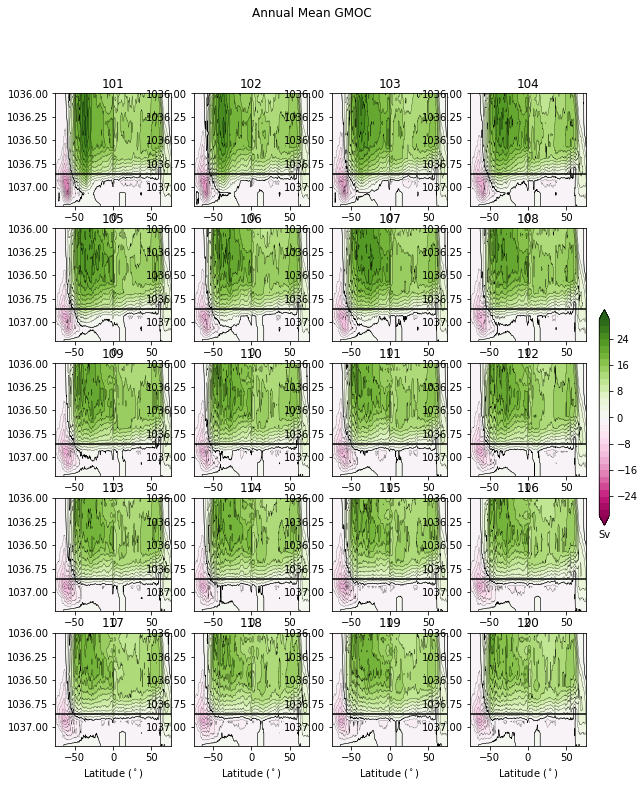

In [15]:
#plot gmoc in rho space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.suptitle('Annual Mean GMOC')
clev = np.arange(-30,32,2)

t1=0
t2=5

yrs=np.arange(101,170,1)
#print yrs
#print yrs.astype('S4')

ii=0
for yr in range(0,20):
    
    #np.mean(pert_gmoc[t1:t2,:,:],axis=0)-np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)
    plt.subplot(5,4,yr+1)
    p1=plt.contourf(yu_ocean,potrho,pert_gmoc[yr,:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
    #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    #cb.ax.set_xlabel('Sv')
    plt.contour(yu_ocean,potrho,pert_gmoc[yr,:,:],levels=clev,colors='k',linewidths=0.25)
    plt.contour(yu_ocean,potrho,pert_gmoc[yr,:,:],levels=[0.0,],colors='k',linewidths=0.5)
    plt.gca().invert_yaxis()
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((1037.2,1036))
    #plt.ylabel('Density (kg m$^{-3}$)')
    plt.xlabel('Latitude ($^\circ$)')
    plt.xlim([-75,75])
    tit=yrs[yr].astype('S4')
    plt.title(yrs[yr])
    plt.plot([-75,75], [1036.86,1036.86], 'k')


ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Sv')

#of = os.path.join(NYFPertDir,'wpm2_cn.pdf')
#print of
#plt.savefig(of)
#of = os.path.join(NYFPertDir,'wpm2_cn.png')
#plt.savefig(of,dpi=220)
#of = os.path.join(NYFPertDir,'gmoc.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'gmoc.png')
plt.savefig(of,dpi=220)

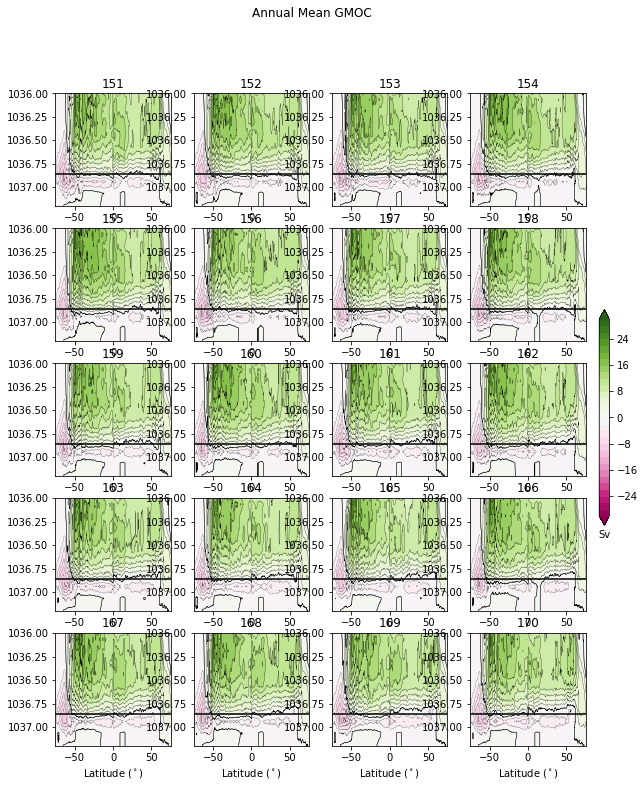

In [18]:
#plot gmoc in rho space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.suptitle('Annual Mean GMOC')
clev = np.arange(-30,32,2)

t1=0
t2=5

yrs=np.arange(101,171,1)
#print yrs
#print yrs.astype('S4')

ii=0
for yr in range(50,70):
    
    #np.mean(pert_gmoc[t1:t2,:,:],axis=0)-np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)
    plt.subplot(5,4,yr-50+1)
    p1=plt.contourf(yu_ocean,potrho,pert_gmoc[yr,:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
    #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    #cb.ax.set_xlabel('Sv')
    plt.contour(yu_ocean,potrho,pert_gmoc[yr,:,:],levels=clev,colors='k',linewidths=0.25)
    plt.contour(yu_ocean,potrho,pert_gmoc[yr,:,:],levels=[0.0,],colors='k',linewidths=0.5)
    plt.gca().invert_yaxis()
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((1037.2,1036))
    #plt.ylabel('Density (kg m$^{-3}$)')
    plt.xlabel('Latitude ($^\circ$)')
    plt.xlim([-75,75])
    tit=yrs[yr].astype('S4')
    plt.title(yrs[yr])
    plt.plot([-75,75], [1036.86,1036.86], 'k')


ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Sv')

#of = os.path.join(NYFPertDir,'wpm2_cn.pdf')
#print of
#plt.savefig(of)
#of = os.path.join(NYFPertDir,'wpm2_cn.png')
#plt.savefig(of,dpi=220)
#of = os.path.join(NYFPertDir,'gmoc.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'gmoc.png')
plt.savefig(of,dpi=220)

In [23]:
#plot time series of AABW
T=np.arange(50)
print(T.shape)


z1=np.argwhere(potrho<1036.86)
z1=z1[-1]

ts=pert_gmoc.shape
ts=ts[0]
print(ts)

# do lower cell average between lats 60-65S
j1=np.argwhere(yt_ocean<-69.9)
j2=np.argwhere(yt_ocean<-60)
j1=j1[-1]
j2=j2[-1]

print(yt_ocean[50:71])

j1=50
j2=71

lc_cntrl60_psj = cntrl_gmoc[:,z1:,j1:j2]
lc_cntrl60_psj_bar = np.mean(lc_cntrl60_psj,2)
lc_cntrl60_psj_ts = np.min(lc_cntrl60_psj_bar,1)

lc_pert60_psj = pert_gmoc[:,z1:,j1:j2]
lc_pert60_psj_bar = np.mean(lc_pert60_psj,2)
lc_pert60_psj_ts = np.min(lc_pert60_psj_bar,1)

lc_anom60_psj = pert_gmoc[0:ts,z1:,j1:j2]-cntrl_gmoc[0:ts,z1:,j1:j2]
lc_max_anom60_psj_ts = np.max(lc_anom60_psj,1)
lc_max_anom60_psj_ts = np.max(lc_max_anom60_psj_ts,1)
lc_max_anom60_psj_ts=np.insert(lc_max_anom60_psj_ts,0,0)
lc_max60_ts = lc_max_anom60_psj_ts + lc_cntrl60_psj_ts[0]

lc_min_anom60_psj_ts = np.min(lc_anom60_psj,1)
lc_min_anom60_psj_ts = np.min(lc_min_anom60_psj_ts,1)
lc_min_anom60_psj_ts=np.insert(lc_min_anom60_psj_ts,0,0)
lc_min60_ts = lc_min_anom60_psj_ts + lc_cntrl60_psj_ts[0]

#print lc_max_ts
#print lc_min_ts

# do lower cell average between lats 40-45S
j1=np.argwhere(yt_ocean<-49.9)
j2=np.argwhere(yt_ocean<-40)
j1=j1[-1]
j2=j2[-1]

lc_cntrl40_psj = cntrl_gmoc[:,z1:,j1:j2]
lc_cntrl40_psj_bar = np.mean(lc_cntrl40_psj,2)
lc_cntrl40_psj_ts = np.min(lc_cntrl40_psj_bar,1)

lc_pert40_psj = pert_gmoc[:,z1:,j1:j2]
lc_pert40_psj_bar = np.mean(lc_pert40_psj,2)
lc_pert40_psj_ts = np.min(lc_pert40_psj_bar,1)

lc_anom40_psj = pert_gmoc[0:ts,z1:,j1:j2]-cntrl_gmoc[0:ts,z1:,j1:j2]

lc_max_anom40_psj_ts = np.max(lc_anom40_psj,1)
lc_max_anom40_psj_ts = np.max(lc_max_anom40_psj_ts,1)
lc_max_anom40_psj_ts=np.insert(lc_max_anom40_psj_ts,0,0)
lc_max40_ts = lc_max_anom40_psj_ts + lc_cntrl40_psj_ts[0]

lc_min_anom40_psj_ts = np.min(lc_anom40_psj,1)
lc_min_anom40_psj_ts = np.min(lc_min_anom40_psj_ts,1)
lc_min_anom40_psj_ts=np.insert(lc_min_anom40_psj_ts,0,0)
lc_min40_ts = lc_min_anom40_psj_ts + lc_cntrl40_psj_ts[0]

# do lower cell average between lats 20-25S
j1=np.argwhere(yt_ocean<-59.9)
j2=np.argwhere(yt_ocean<-50)
j1=j1[-1]
j2=j2[-1]

lc_cntrl50_psj = cntrl_gmoc[:,z1:,j1:j2]
lc_cntrl50_psj_bar = np.mean(lc_cntrl50_psj,2)
lc_cntrl50_psj_ts = np.min(lc_cntrl50_psj_bar,1)

lc_pert50_psj = pert_gmoc[:,z1:,j1:j2]
lc_pert50_psj_bar = np.mean(lc_pert50_psj,2)
lc_pert50_psj_ts = np.min(lc_pert50_psj_bar,1)

lc_anom50_psj = pert_gmoc[0:ts,z1:,j1:j2]-cntrl_gmoc[0:ts,z1:,j1:j2]

lc_max_anom50_psj_ts = np.max(lc_anom50_psj,1)
lc_max_anom50_psj_ts = np.max(lc_max_anom50_psj_ts,1)
lc_max_anom50_psj_ts=np.insert(lc_max_anom50_psj_ts,0,0)
lc_max50_ts = lc_max_anom50_psj_ts + lc_cntrl50_psj_ts[0]

lc_min_anom50_psj_ts = np.min(lc_anom50_psj,1)
lc_min_anom50_psj_ts = np.min(lc_min_anom50_psj_ts,1)
lc_min_anom50_psj_ts=np.insert(lc_min_anom50_psj_ts,0,0)
lc_min50_ts = lc_min_anom50_psj_ts + lc_cntrl50_psj_ts[0]

plt.subplot(211)
plt.plot(lc_cntrl60_psj_ts,linestyle='-',color='k',label='60-70$^\circ$S',linewidth=2)
plt.plot(lc_pert60_psj_ts,linestyle='-',color='g',label='60-70$^\circ$S',linewidth=2)
plt.plot(lc_cntrl50_psj_ts,linestyle='--',color='k',label='50-60$^\circ$S',linewidth=2)
plt.plot(lc_pert50_psj_ts,linestyle='--',color='g',label='50-60$^\circ$S',linewidth=2)
plt.plot(lc_cntrl40_psj_ts,linestyle=':',color='k',label='40-50$^\circ$S',linewidth=2)
plt.plot(lc_pert40_psj_ts,linestyle=':',color='g',label='40-50$^\circ$S',linewidth=2)
#plt.plot(lc_max40_ts,linestyle=':',color='g',linewidth=1.5)
#plt.plot(lc_min40_ts,linestyle=':',color='b',linewidth=1.5)
#plt.plot(lc_cntrl40_psj_ts,linestyle=':',color='k',label='40-50$^\circ$S',linewidth=2)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='GMOC Lower Cell Rho > ' +str(potrho[z1])
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(212)
plt.plot(lc_max60_ts,linestyle='-',color='g',linewidth=1.5)
plt.plot(lc_min60_ts,linestyle='-',color='b',linewidth=1.5)
plt.plot(lc_cntrl60_psj_ts,linestyle='-',color='k',label='60-70$^\circ$S',linewidth=2)
plt.plot(lc_max50_ts,linestyle='--',color='g',linewidth=1.5)
plt.plot(lc_min50_ts,linestyle='--',color='b',linewidth=1.5)
plt.plot(lc_cntrl50_psj_ts,linestyle='--',color='k',label='50-60$^\circ$S',linewidth=2)
#plt.plot(lc_max40_ts,linestyle=':',color='g',linewidth=1.5)
#plt.plot(lc_min40_ts,linestyle=':',color='b',linewidth=1.5)
#plt.plot(lc_cntrl40_psj_ts,linestyle=':',color='k',label='40-50$^\circ$S',linewidth=2)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='GMOC Lower Cell Rho Min/Max Anom > ' +str(potrho[z1])
plt.title(tit)
plt.legend(fontsize=10)

#of = os.path.join(NYFPertDir,'gmoc_ts.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'gmoc_ts.png')
plt.savefig(of,dpi=220)

(50,)
71
[-75.79707137 -75.69147278 -75.5858742  -75.48027561 -75.37467702
 -75.26907843 -75.16347984 -75.05788125 -74.95228266 -74.84668407
 -74.74108548 -74.63548689 -74.5298883  -74.42428971 -74.31869112
 -74.21309254 -74.10749395 -74.00189536 -73.89629677 -73.79069818
 -73.68509959]


TypeError: only integer scalar arrays can be converted to a scalar index

Files found but not yet indexed: 0
No new .nc files found.


True

['GFDL50',
 'KDS75',
 'KDS75_PI',
 'KDS75_UP',
 'KDS75_WOA13',
 'KDS75_newbathy_CORE',
 'KDS75_newbathy_JRA',
 'KDS75_newbathy_JRA_runoff',
 'KDS75_salt10days',
 'KDS75_saltfluxes',
 'KDS75_wind',
 'kds75_cp',
 'kds75_wp2']

In [12]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data1/v45/pas561/mom/archive/VertOverturn/mom01_unmasked_ocean_grid.nc'
vgrid_file ='/g/data1/v45/pas561/mom/archive/VertOverturn/kds75.uvwt.230-257.ncra.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
print(geolon_t.shape)

fh=fcor/ht
print(fh.shape)

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
#potrho = nc.variables['potrho'][:]
#dzt = nc.variables['dzt'][:]
nc.close() # close the file
print(st_ocean.shape)
#print potrho.shape
print(yt_ocean.shape)

#fix this to a 12 month average
nc = Dataset('/g/data3/hh5/tmp/pas561/kds75_cp/dzt.9month.nc', mode='r') # file handle, open in read only mode
dzt = nc.variables['dzt'][:]
nc.close() # close the file
print(dzt.shape)

#fix this to a 12 month average
nc = Dataset('/g/data3/hh5/tmp/cosima/mom01v5/kds75_cp/output443/ocean.nc', mode='r') # file handle, open in read only mode
potrho = nc.variables['potrho'][:]
nc.close() # close the file
print(potrho.shape)


dzt=np.squeeze(dzt)
print(dzt.shape)

(2700, 3600)
(2700, 3600)
(75,)
(2700,)
(1, 75, 2700, 3600)
(80,)
(75, 2700, 3600)


In [11]:
#expt='kds75_cp'
#cntrl_tx= cc.get_nc_variable(expt,
#                    'ocean.nc',
#                    'tau_x',
#                    time_units='days since 1860-01-01',
#                    use_bag=True,
#                    )
#print(cntrl_tx.shape)
##mean_mld = mld.sel(time=slice('1975-01','1975-12')).mean('time')
#cntrl_tx_1974 = cntrl_tx.sel(yu_ocean=slice(-80,-30)).sel(time='1974').mean('time')
##cntrl_tx_1974.plot.pcolormesh()

#expt='kds75_wp2'
#pert_tx= cc.get_nc_variable(expt,
#                    'ocean.nc',
#                    'tau_x',
#                    time_units='days since 1860-01-01',
#                    use_bag=True,
#                    )
#print(pert_tx.shape)
##mean_mld = mld.sel(time=slice('1975-01','1975-12')).mean('time')
#pert_tx_1974 = pert_tx.sel(yu_ocean=slice(-80,-30)).sel(time='1974').mean('time')
##pert_tx_1974.plot.pcolormesh()

Ocean_File = os.path.join(NYFCntrlDir,'tx.cat.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl.tau_x.shape)


Ocean_File = os.path.join(NYFPertDir,'tx.cat.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(pert.tau_x.shape)

/g/data3/hh5/tmp/pas561/kds75_cp/tx.cat.nc
(67, 2700, 3600)
/g/data3/hh5/tmp/pas561/kds75_wp2/tx.cat.nc
(65, 2700, 3600)


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


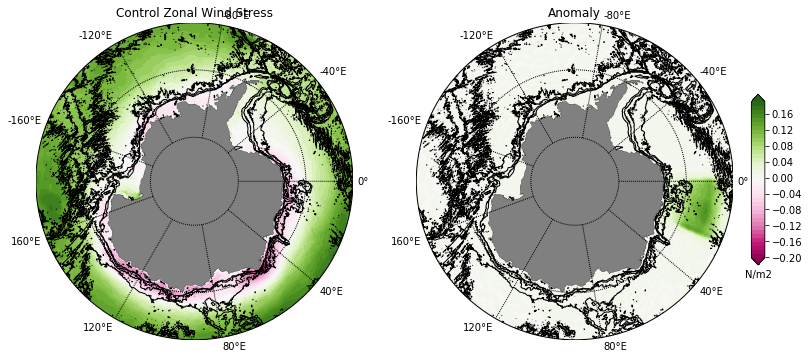

In [14]:
#do second full year
t1=3
t2=7


plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

clev = np.arange(-.2,.2,.01)

plt.subplot(1,2,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,cntrl.tau_x[t1:t2,:,:].mean('time').load(), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('N/m2')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('Control Zonal Wind Stress')

#clev = np.arange(-.1,.1,.01)

plt.subplot(1,2,2)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,pert.tau_x[t1:t2,:,:].mean('time').load()-cntrl.tau_x[t1:t2,:,:].mean('time').load(), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('N/m2')
clev3 = np.arange(0,5000,1000)
map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('Anomaly')

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('N/m2')

#of = os.path.join(NYFPertDir,'tau_x.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'tau_x.png')
plt.savefig(of,dpi=220)


0 4 [443 444 445 446]
3 7 [446 447 448 449]
7 11 [450 451 452 453]
11 15 [454 455 456 457]
15 19 [458 459 460 461]
19 23 [462 463 464 465]
23 27 [466 467 468 469]
27 31 [470 471 472 473]
31 35 [474 475 476 477]
35 39 [478 479 480 481]
39 43 [482 483 484 485]
43 47 [486 487 488 489]
47 51 [490 491 492 493]
51 55 [494 495 496 497]
55 59 [498 499 500 501]


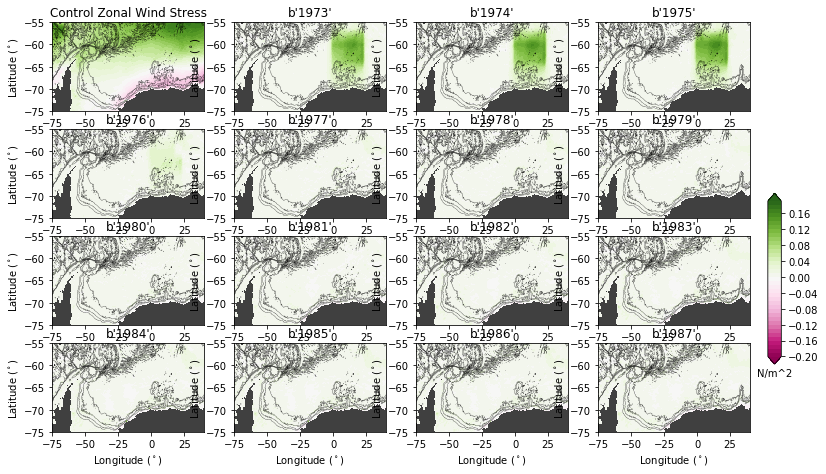

In [14]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.2,.2,.01)
clev3 = np.arange(0,5000,1000)

t1=3
t2=7 

plt.subplot(541)
plt.gca().patch.set_color('.25')
p1=plt.contourf(xt_ocean,yt_ocean,cntrl.tau_x[t1:t2,:,:].mean('time').load(),cmap=plt.cm.PiYG,levels=clev,extend='both')
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('N/m^2')
clev3 = np.arange(0,5000,1000)
plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((-75,-55))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.xlim([-75,40])
plt.title('Control Zonal Wind Stress')


yrs=np.arange(1973,2016,1)

ii=0
seasons=np.arange(443,509)

for yr in range(0,15):
    
    if yr<1:
        #first year is only 9 months ... use first 3 months of next year
        t1=0
        t2=4
    elif yr<2:
        t1=3
        t2=7
    else:
        t1=t2
        t2=t2+4
    
    print(t1, t2, seasons[t1:t2])
    
    plt.subplot(5,4,yr+2)
    plt.gca().patch.set_color('.25')
    p1=plt.contourf(xt_ocean,yt_ocean,pert.tau_x[t1:t2,:,:].mean('time').load()-cntrl.tau_x[t1:t2,:,:].mean('time').load(),cmap=plt.cm.PiYG,levels=clev,extend='both')
    #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    #cb.ax.set_xlabel('N/m^2')
    clev3 = np.arange(0,5000,1000)
    plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((-75,-55))
    plt.xlabel('Longitude ($^\circ$)')
    plt.ylabel('Latitude ($^\circ$)')
    plt.xlim([-75,40])
    plt.title(yrs[yr].astype('S4'))
    
    #ii+=12
    
ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('N/m^2')

#of = os.path.join(NYFPertDir,'wpm2_tx.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'wpm2_tx.png')
plt.savefig(of,dpi=220)


In [ ]:
Ocean_File = os.path.join(NYFCntrlDir,'txty.cat.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl.tau_x.shape)


Ocean_File = os.path.join(NYFPertDir,'txty.cat.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(pert.tau_x.shape)

In [13]:
t1=0
t2=1

print(cntrl.tau_x.shape)
cntrl_Txf=cntrl.tau_x[t1:t2,:,:].mean('time').load()/fcor
cntrl_Tyf=cntrl.tau_y[t1:t2,:,:].mean('time').load()/fcor
print(cntrl_Txf.shape)

cntrl_dTyfdx=np.gradient(cntrl_Tyf,dxt,axis=1)
print(cntrl_dTyfdx.shape)
cntrl_dTxfdy=np.gradient(cntrl_Txf,dyt,axis=0)
print(cntrl_dTxfdy.shape)

rho0=1035.0
cntrl_we=(cntrl_dTyfdx-cntrl_dTxfdy)/rho0


print(pert.tau_x.shape)
pert_Txf=pert.tau_x[t1:t2,:,:].mean('time').load()/fcor
pert_Tyf=pert.tau_y[t1:t2,:,:].mean('time').load()/fcor
print(pert_Tyf.shape)

pert_dTyfdx=np.gradient(pert_Tyf,dxt,axis=1)
print(pert_dTyfdx.shape)
pert_dTxfdy=np.gradient(pert_Txf,dyt,axis=0)
print(pert_dTxfdy.shape)

rho0=1035.0
pert_we=(pert_dTyfdx-pert_dTxfdy)/rho0



(67, 2700, 3600)


AttributeError: 'Dataset' object has no attribute 'tau_y'

In [ ]:
m=np.nanmax(cntrl_we[0:1000,:])
print(m)
m=np.nanmin(cntrl_we[0:1000,:])
print(m)

m=np.nanmax(pert_we[0:1000,:])
print(m)
m=np.nanmin(pert_we[0:1000,:])
print(m)

#convert from m/s to m/day
s_day=60*60*24
print(s_day)
cntrl_we=cntrl_we*s_day
pert_we=pert_we*s_day

m=np.nanmax(cntrl_we[0:1000,:])
print(m)
m=np.nanmin(cntrl_we[0:1000,:])
print(m)

m=np.nanmax(pert_we[0:1000,:])
print(m)
m=np.nanmin(pert_we[0:1000,:])
print(m)

print(cntrl_we.shape)

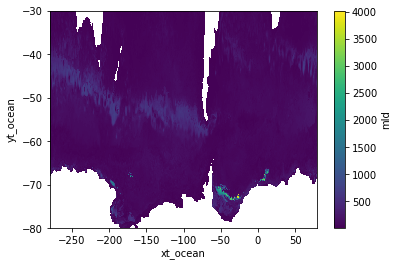

In [31]:
expt='kds75_cp'
mld= cc.get_nc_variable(expt,
                    'ocean_month.nc',
                    'mld',
                    time_units='days since 1860-01-01',
                    use_bag=True,
                    )
#mean_mld = mld.sel(time=slice('1975-01','1975-12')).mean('time')
mean_mld = mld.sel(yt_ocean=slice(-80,-30)).sel(time='1975-09').mean('time')
#mean_mld = mld.mean('time')
mean_mld.plot.pcolormesh()

In [17]:
#expt='kds75_wp2'
#mld= cc.get_nc_variable(expt,
#                    'ocean.nc',
#                    'mld',
#                    time_units='days since 1860-01-01',
#                    use_bag=True,
#                    )
#print(mld.shape)
##mean_mld = mld.sel(time=slice('1975-01','1975-12')).mean('time')
##mean_mld = mld.sel(yt_ocean=slice(-80,-30)).sel(time='1975-09').mean('time')
##mean_mld = mld.mean('time')
##mean_mld.plot.pcolormesh()

In [19]:
#pert_i=cc.get_nc_variable('kds75_wp2',
#                    'ice_month.nc',
##                    'CN',
#                    time_units='days since 1973-04-01',
#                    use_bag=True,
#                    chunks={'time': 1}
#                    )
#septice = pert_i.sel(yt_ocean=slice(-80,-55)).sum('ct')
#septice.isel(time=18).plot.pcolormesh()

#plot stamps of sea ice concentration.
Ocean_File = os.path.join(NYFCntrlDir,'CN.cat.nc')
cntrl_i=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl_i.CN.shape)

Ocean_File = os.path.join(NYFPertDir,'CN.cat.nc')
pert_i=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(pert_i.CN.shape)

(201, 5, 2700, 3600)
(194, 5, 2700, 3600)


In [21]:
mnths=np.arange(0,15*12)
tits1=['Apr','May','June','July','Aug.','Sept.','Oct.', 'Nov.']
tits2=['Jan','Feb','Mar','Apr','May','June','July','Aug.','Sept.','Oct.', 'Nov.', 'Sep.','Oct.','Nov.','Dec.']
#print mnths
for yr in range(0,11):
    for i in range(5,11):    
        if yr==0:
            t1=i-3
            print(t1, mnths[t1], tits1[t1])
        elif yr==1:
            t1=i-3
            print(t1, mnths[t1], tits1[t1])
        else:
            t1=(yr-1)*12+i-3
            print(t1, mnths[t1])#, tits2[t1]

2 2 June
3 3 July
4 4 Aug.
5 5 Sept.
6 6 Oct.
7 7 Nov.
2 2 June
3 3 July
4 4 Aug.
5 5 Sept.
6 6 Oct.
7 7 Nov.
14 14
15 15
16 16
17 17
18 18
19 19
26 26
27 27
28 28
29 29
30 30
31 31
38 38
39 39
40 40
41 41
42 42
43 43
50 50
51 51
52 52
53 53
54 54
55 55
62 62
63 63
64 64
65 65
66 66
67 67
74 74
75 75
76 76
77 77
78 78
79 79
86 86
87 87
88 88
89 89
90 90
91 91
98 98
99 99
100 100
101 101
102 102
103 103
110 110
111 111
112 112
113 113
114 114
115 115


['June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.']
2
3
4
5
6
7
2
3
4
5
6
7
14
15
16
17
18
19
26
27
28
29
30
31
38
39
40
41
42
43
50
51
52
53
54
55
62
63
64
65
66
67
74
75
76
77
78
79
86
87
88
89
90
91
98
99
100
101
102
103
110
111
112
113
114
115
122
123
124
125
126
127
134
135
136
137
138
139
146
147
148
149
150
151
158
159
160
161
162
163


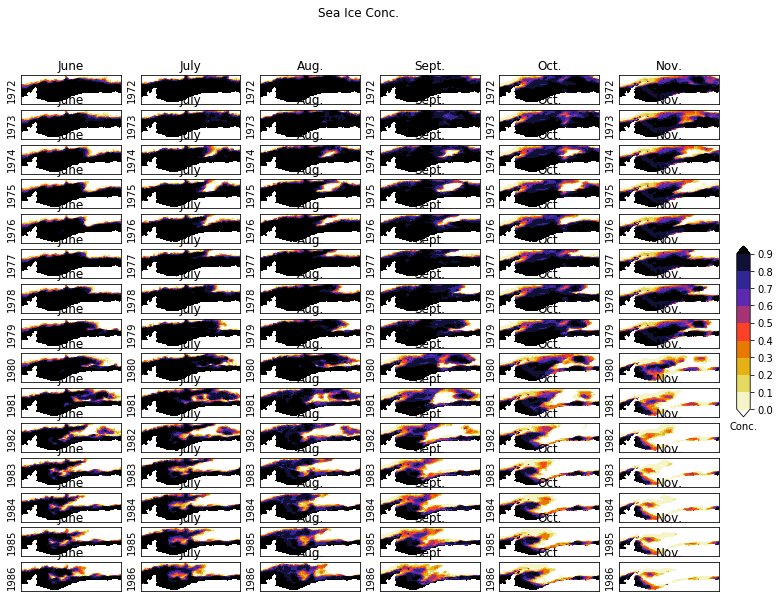

In [25]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.suptitle('Sea Ice Conc.')

tits=['June','July','Aug.','Sept.','Oct.', 'Nov.']
yrs=np.arange(1972,2016,1)
print(tits)


ii=0
for yr in range(0,15):
    #print yr
    for i in range(5,11): 
        
        #print yr*12+i
    
        clev = np.arange(0,1,.1)
        plt.subplot(15,6,ii+1)
        plt.gca().patch.set_color('.25')
        
        if yr==0:
            #starts in april 
            t1=i-3
            p1=plt.contourf(xt_ocean,yt_ocean[0:1000],cntrl_i.CN[t1,:,0:1000,:].sum('ct').load(),cmap=plt.cm.CMRmap_r,levels=clev,extend='both')
        elif yr==1:
            #starts in april 
            t1=i-3
            p1=plt.contourf(xt_ocean,yt_ocean[0:1000],pert_i.CN[t1,:,0:1000,:].sum('ct').load(),cmap=plt.cm.CMRmap_r,levels=clev,extend='both')
        else:
            t1=(yr-1)*12+i-3
            p1=plt.contourf(xt_ocean,yt_ocean[0:1000],pert_i.CN[t1,:,0:1000,:].sum('ct').load(),cmap=plt.cm.CMRmap_r,levels=clev,extend='both')
        
        print(t1)
        #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
        #cb.ax.set_xlabel('Conc.')
        #clev3 = np.arange(0,5000,1000)
        #plt.contour(xt_ocean,yt_ocean,ht,levels=clev3,colors='k',linewidths=0.25)
        plt.gca().yaxis.set_major_formatter(x_formatter)
        plt.ylim((-80,-55))
        #plt.xlabel('Longitude ($^\circ$)')
        plt.ylabel(yrs[yr])
        plt.xlim([-80,40])
        plt.title(tits[i-5])     
        plt.gca().axes.get_xaxis().set_ticks([])
        plt.gca().axes.get_yaxis().set_ticks([])
        
        ii+=1

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Conc.')

#of = os.path.join(NYFPertDir,'cn.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'cn.png')
plt.savefig(of,dpi=220)


(87, 5, 2700, 3600)
(87, 2700, 3600)


In [ ]:
expt='kds75_cp'
psi = cc.get_nc_variable(expt, 'ocean.nc', 'ty_trans_rho',
                          chunks={'potrho': None}, n=5,
                          time_units = 'days since 1700-01-01')
psi = psi.sum('grid_xt_ocean')
psi_avg = psi.cumsum('potrho').mean('time') -  psi.sum('potrho').mean('time')
psi_avg.load()

Text(0.5,1,'Overturning in kds75_cp')

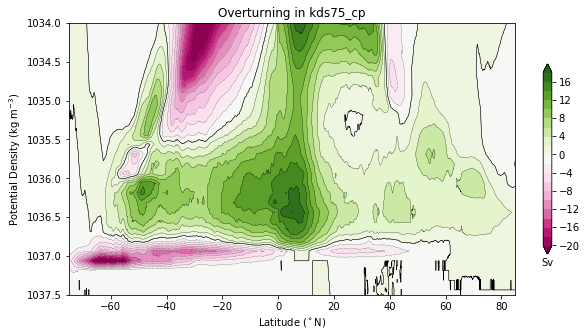

In [33]:
plt.figure(figsize=(10, 5)) 
clev=np.arange(-20,20,2)
plt.contourf(psi_avg.grid_yu_ocean, 
                 psi_avg.potrho, psi_avg, 
                 cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical', shrink = 0.7)
    
cb.ax.set_xlabel('Sv')
plt.contour(psi_avg.grid_yu_ocean, psi_avg.potrho, psi_avg, levels=clev, colors='k', linewidths=0.25)
plt.contour(psi_avg.grid_yu_ocean, psi_avg.potrho, psi_avg, levels=[0.0,], colors='k', linewidths=0.5)
plt.gca().invert_yaxis()
    
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Overturning in %s' % expt)

In [ ]:
expts = ['kds75_cp','kds75_wp2']

for e in expts:
    psi = cc.get_nc_variable(e, 'ocean.nc', 'ty_trans_rho',
                          chunks={'potrho': None},
                          time_units = 'days since 1860-01-01')
    psi = psi.sum('grid_xt_ocean')
    psi_sum = psi.cumsum('potrho') - psi.sum('potrho')
    psi_aabw = psi_sum.sel(method='Nearest',grid_yu_ocean=-40).sel(potrho=slice(1036,None))\
                .min('potrho').resample(time='A').mean()
    psi_aabw = psi_aabw.compute()
    psi_aabw.plot(label=e)
    
    if e == 'kds75_cp':
        cntrl_gmoc = psi_sum
        print(cntrl_gmoc.shape)
        of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
        print(of)
        a=np.save(of,cntrl_gmoc)
    if e == 'kds75_wp2':
        pert_gmoc = psi_sum
        print(pert_gmoc.shape)
        print(of)
        of=os.path.join(NYFPertDir,'gmoc_adv_rho.npy')
        a=np.save(of,pert_gmoc)
    

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=67), HTML(value='')))

ERROR:sqlalchemy.pool.StaticPool:Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/sqlalchemy/pool.py", line 687, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/sqlalchemy/pool.py", line 829, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/sqlalchemy/engine/default.py", line 440, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread.The object was created in thread id 140277853292288 and this is thread id 140268464502528
ERROR:sqlalchemy.pool.StaticPool:Exception closing connection <sqlite3.Connection object at 0x7f9468b12810>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/pytho

(67, 80, 2700)


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=65), HTML(value='')))

(65, 80, 2700)


In [17]:
#calc annual mean gmocs

#load gmoc in rho space
of=os.path.join(NYFPertDir,'gmoc_adv_rho.npy')
pert_gmoc=np.load(of)
print(pert_gmoc.shape)

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
cntrl_gmoc=np.load(of)
print(cntrl_gmoc.shape)

cntrl_gmoc_ann=np.zeros((15,cntrl_gmoc.shape[1],cntrl_gmoc.shape[2]))
pert_gmoc_ann=np.zeros((15,cntrl_gmoc.shape[1],cntrl_gmoc.shape[2]))
print(cntrl_gmoc_ann.shape)
print(pert_gmoc_ann.shape)

yrs=np.arange(1973,2016,1)

ii=0
seasons=np.arange(443,509)

for yr in range(0,15):
    if yr<1:
        #first year is only 9 months ... use first 3 months of next year
        t1=0
        t2=4
    elif yr<2:
        t1=3
        t2=7
    else:
        t1=t2
        t2=t2+4
    
    #calc annual means of gmocs
    cntrl_gmoc_ann[yr,:,:]=np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)
    pert_gmoc_ann[yr,:,:]=np.mean(pert_gmoc[t1:t2,:,:],axis=0)
    print(yr, t1, t2, seasons[t1:t2])

print(cntrl_gmoc_ann.shape)
of=os.path.join(NYFCntrlDir,'ann_gmoc_adv_rho.npy')
print(of)
a=np.save(of,cntrl_gmoc_ann)

print(pert_gmoc_ann.shape)
of=os.path.join(NYFPertDir,'ann_gmoc_adv_rho.npy')
print(of)
a=np.save(of,pert_gmoc_ann)

    
    
    
      

(65, 80, 2700)
(67, 80, 2700)
(15, 80, 2700)
(15, 80, 2700)
0 0 4 [443 444 445 446]
1 3 7 [446 447 448 449]
2 7 11 [450 451 452 453]
3 11 15 [454 455 456 457]
4 15 19 [458 459 460 461]
5 19 23 [462 463 464 465]
6 23 27 [466 467 468 469]
7 27 31 [470 471 472 473]
8 31 35 [474 475 476 477]
9 35 39 [478 479 480 481]
10 39 43 [482 483 484 485]
11 43 47 [486 487 488 489]
12 47 51 [490 491 492 493]
13 51 55 [494 495 496 497]
14 55 59 [498 499 500 501]
(15, 80, 2700)
/g/data3/hh5/tmp/pas561/kds75_cp/ann_gmoc_adv_rho.npy
(15, 80, 2700)
/g/data3/hh5/tmp/pas561/kds75_wp2/ann_gmoc_adv_rho.npy


In [18]:
#load gmoc in rho space
of=os.path.join(NYFPertDir,'ann_gmoc_adv_rho.npy')
pert_gmoc=np.load(of)
print(pert_gmoc.shape)

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
of=os.path.join(NYFCntrlDir,'ann_gmoc_adv_rho.npy')
cntrl_gmoc=np.load(of)
print(cntrl_gmoc.shape)

(15, 80, 2700)
(15, 80, 2700)


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


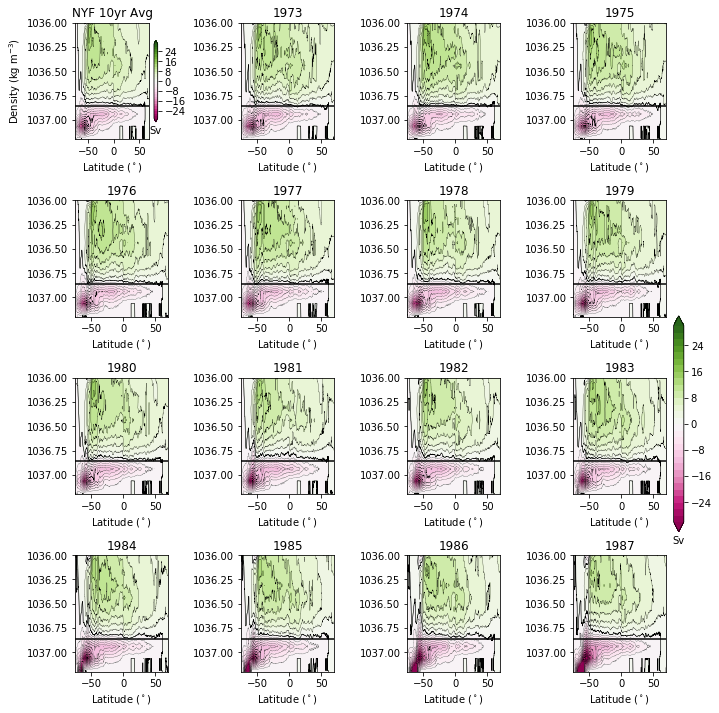

In [20]:
#seasons=np.arange(443,472)
t1=0
t2=10

#plot gmoc adv in rho space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Advective GMOC')
clev = np.arange(-30,32,2)


plt.subplot(541)
plt.contourf(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,70])
tit='NYF 10yr Avg'
plt.title(tit)
plt.plot([-75,70], [1036.86,1036.86], 'k')


ii=0
for yr in range(0,15):
    

    #np.mean(pert_gmoc[t1:t2,:,:],axis=0)-np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)
    plt.subplot(5,4,yr+2)
    p1=plt.contourf(yu_ocean,potrho,pert_gmoc[yr,:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
    #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    #cb.ax.set_xlabel('Sv')
    plt.contour(yu_ocean,potrho,pert_gmoc[yr,:,:],levels=clev,colors='k',linewidths=0.25)
    plt.contour(yu_ocean,potrho,pert_gmoc[yr,:,:],levels=[0.0,],colors='k',linewidths=0.5)
    plt.gca().invert_yaxis()
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((1037.2,1036))
    #plt.ylabel('Density (kg m$^{-3}$)')
    plt.xlabel('Latitude ($^\circ$)')
    plt.xlim([-75,70])
    tit=yrs[yr].astype('S4')
    plt.title(yrs[yr])
    plt.plot([-75,70], [1036.86,1036.86], 'k')


ax3 = plt.axes([0.99,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Sv')

plt.tight_layout()

#of = os.path.join(NYFPertDir,'wpm2_cn.pdf')
#print of
#plt.savefig(of)
#of = os.path.join(NYFPertDir,'wpm2_cn.png')
#plt.savefig(of,dpi=220)
#of = os.path.join(NYFPertDir,'gmoc.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'gmoc_adv.png')
plt.savefig(of,dpi=220)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


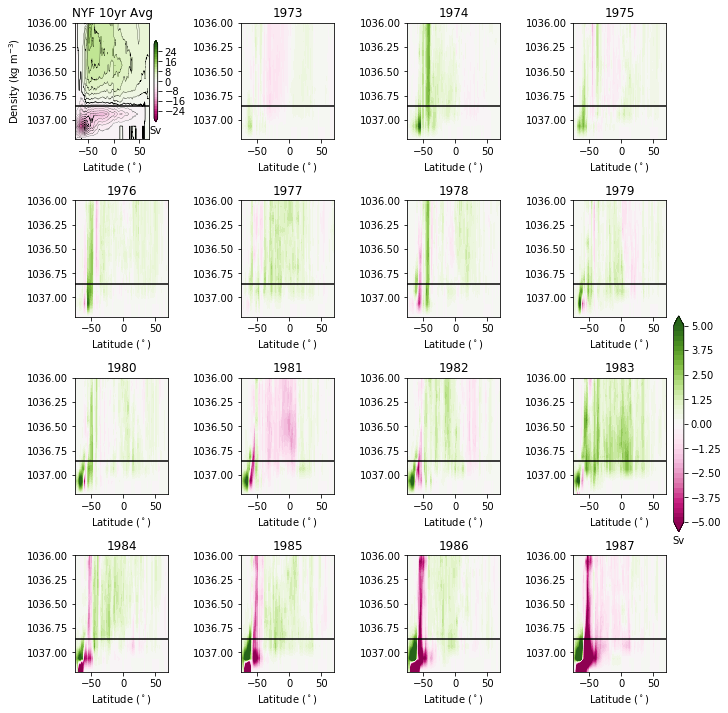

In [22]:
#seasons=np.arange(443,472)
t1=0
t2=10

#plot gmoc adv in rho space
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Advective GMOC')
clev = np.arange(-30,32,2)


plt.subplot(541)
plt.contourf(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.2,1036))
plt.ylabel('Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$)')
plt.xlim([-75,70])
tit='NYF 10yr Avg'
plt.title(tit)
plt.plot([-75,70], [1036.86,1036.86], 'k')


ii=0
for yr in range(0,15):
    
    clev = np.arange(-5,5.25,0.25)

    #np.mean(pert_gmoc[t1:t2,:,:],axis=0)-np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)
    plt.subplot(5,4,yr+2)
    p1=plt.contourf(yu_ocean,potrho,pert_gmoc[yr,:,:]-cntrl_gmoc[yr,:,:],cmap=plt.cm.PiYG,levels=clev,extend='both')
    #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    #cb.ax.set_xlabel('Sv')
    #plt.contour(yu_ocean,potrho,np.mean(pert_gmoc[t1:t2,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
    #plt.contour(yu_ocean,potrho,np.mean(pert_gmoc[t1:t2,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
    plt.gca().invert_yaxis()
    plt.gca().yaxis.set_major_formatter(x_formatter)
    plt.ylim((1037.2,1036))
    #plt.ylabel('Density (kg m$^{-3}$)')
    plt.xlabel('Latitude ($^\circ$)')
    plt.xlim([-75,70])
    tit=yrs[yr].astype('S4')
    plt.title(yrs[yr])
    plt.plot([-75,70], [1036.86,1036.86], 'k')


ax3 = plt.axes([0.99,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Sv')

plt.tight_layout()

#of = os.path.join(NYFPertDir,'wpm2_cn.pdf')
#print of
#plt.savefig(of)
#of = os.path.join(NYFPertDir,'wpm2_cn.png')
#plt.savefig(of,dpi=220)
#of = os.path.join(NYFPertDir,'gmoc.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'gmoc_adv_anom.png')
plt.savefig(of,dpi=220)

(50,)
15
(15, 80, 2700)
[265] [489] [70]
(15, 80, 2700)
[666] [807] [70]
(15, 80, 2700)
[491] [665] [70]


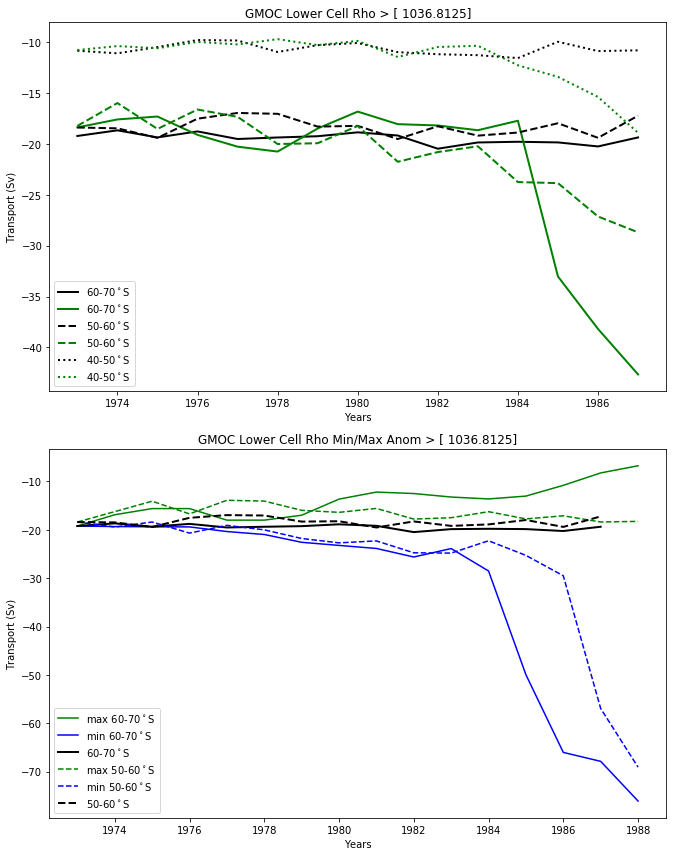

In [35]:
#plot time series of AABW or full transports (with GM ... only 9 yrs for CNTRL) so using cntrl mean
T=np.arange(50)
print(T.shape)


z1=np.argwhere(potrho<1036.86)
z1=z1[-1]

ts=pert_gmoc.shape
ts=ts[0]
print(ts)

# do lower cell average between lats 60-65S
j1=np.argwhere(yt_ocean<-69.9)
j2=np.argwhere(yt_ocean<-60)
j1=j1[-1]
j2=j2[-1]

print(cntrl_gmoc.shape)
print(j1,j2,z1)

lc_cntrl60_psj = cntrl_gmoc[:,70:,265:489]#cntrl_gmoc[0:9,z1:,j1:j2]
lc_cntrl60_psj_bar = np.mean(lc_cntrl60_psj,2)
lc_cntrl60_psj_ts = np.min(lc_cntrl60_psj_bar,1)

lc_pert60_psj = pert_gmoc[:,70:,265:489]
lc_pert60_psj_bar = np.mean(lc_pert60_psj,2)
lc_pert60_psj_ts = np.min(lc_pert60_psj_bar,1)

lc_anom60_psj = pert_gmoc[0:ts,70:,265:489]-np.mean(cntrl_gmoc[:,70:,265:489],axis=0)
lc_max_anom60_psj_ts = np.max(lc_anom60_psj,1)
lc_max_anom60_psj_ts = np.max(lc_max_anom60_psj_ts,1)
lc_max_anom60_psj_ts=np.insert(lc_max_anom60_psj_ts,0,0)
lc_max60_ts = lc_max_anom60_psj_ts + lc_cntrl60_psj_ts[0]

lc_min_anom60_psj_ts = np.min(lc_anom60_psj,1)
lc_min_anom60_psj_ts = np.min(lc_min_anom60_psj_ts,1)
lc_min_anom60_psj_ts=np.insert(lc_min_anom60_psj_ts,0,0)
lc_min60_ts = lc_min_anom60_psj_ts + lc_cntrl60_psj_ts[0]

#print lc_max_ts
#print lc_min_ts

# do lower cell average between lats 40-45S
j1=np.argwhere(yt_ocean<-49.9)
j2=np.argwhere(yt_ocean<-40)
j1=j1[-1]
j2=j2[-1]

print(cntrl_gmoc.shape)
print(j1,j2,z1)


lc_cntrl40_psj = cntrl_gmoc[:,70:,666:807]#j1:j2]
lc_cntrl40_psj_bar = np.mean(lc_cntrl40_psj,2)
lc_cntrl40_psj_ts = np.min(lc_cntrl40_psj_bar,1)

lc_pert40_psj = pert_gmoc[:,70:,666:807]
lc_pert40_psj_bar = np.mean(lc_pert40_psj,2)
lc_pert40_psj_ts = np.min(lc_pert40_psj_bar,1)

lc_anom40_psj = pert_gmoc[0:ts,70:,666:807]-np.mean(cntrl_gmoc[:,70:,666:807],axis=0)

lc_max_anom40_psj_ts = np.max(lc_anom40_psj,1)
lc_max_anom40_psj_ts = np.max(lc_max_anom40_psj_ts,1)
lc_max_anom40_psj_ts=np.insert(lc_max_anom40_psj_ts,0,0)
lc_max40_ts = lc_max_anom40_psj_ts + lc_cntrl40_psj_ts[0]

lc_min_anom40_psj_ts = np.min(lc_anom40_psj,1)
lc_min_anom40_psj_ts = np.min(lc_min_anom40_psj_ts,1)
lc_min_anom40_psj_ts=np.insert(lc_min_anom40_psj_ts,0,0)
lc_min40_ts = lc_min_anom40_psj_ts + lc_cntrl40_psj_ts[0]

# do lower cell average between lats 20-25S
j1=np.argwhere(yt_ocean<-59.9)
j2=np.argwhere(yt_ocean<-50)
j1=j1[-1]
j2=j2[-1]

print(cntrl_gmoc.shape)
print(j1,j2,z1)


lc_cntrl50_psj = cntrl_gmoc[:,70:,491:665]
lc_cntrl50_psj_bar = np.mean(lc_cntrl50_psj,2)
lc_cntrl50_psj_ts = np.min(lc_cntrl50_psj_bar,1)

lc_pert50_psj = pert_gmoc[:,70:,491:665]
lc_pert50_psj_bar = np.mean(lc_pert50_psj,2)
lc_pert50_psj_ts = np.min(lc_pert50_psj_bar,1)

lc_anom50_psj = pert_gmoc[0:ts,70:,491:665]-np.mean(cntrl_gmoc[:,70:,491:665],axis=0)

lc_max_anom50_psj_ts = np.max(lc_anom50_psj,1)
lc_max_anom50_psj_ts = np.max(lc_max_anom50_psj_ts,1)
lc_max_anom50_psj_ts=np.insert(lc_max_anom50_psj_ts,0,0)
lc_max50_ts = lc_max_anom50_psj_ts + lc_cntrl50_psj_ts[0]

lc_min_anom50_psj_ts = np.min(lc_anom50_psj,1)
lc_min_anom50_psj_ts = np.min(lc_min_anom50_psj_ts,1)
lc_min_anom50_psj_ts=np.insert(lc_min_anom50_psj_ts,0,0)
lc_min50_ts = lc_min_anom50_psj_ts + lc_cntrl50_psj_ts[0]

plt.subplot(211)
plt.plot(yrs[0:15],lc_cntrl60_psj_ts,linestyle='-',color='k',label='60-70$^\circ$S',linewidth=2)
plt.plot(yrs[0:15],lc_pert60_psj_ts,linestyle='-',color='g',label='60-70$^\circ$S',linewidth=2)
plt.plot(yrs[0:15],lc_cntrl50_psj_ts,linestyle='--',color='k',label='50-60$^\circ$S',linewidth=2)
plt.plot(yrs[0:15],lc_pert50_psj_ts,linestyle='--',color='g',label='50-60$^\circ$S',linewidth=2)
plt.plot(yrs[0:15],lc_cntrl40_psj_ts,linestyle=':',color='k',label='40-50$^\circ$S',linewidth=2)
plt.plot(yrs[0:15],lc_pert40_psj_ts,linestyle=':',color='g',label='40-50$^\circ$S',linewidth=2)
#plt.plot(lc_max40_ts,linestyle=':',color='g',linewidth=1.5)
#plt.plot(lc_min40_ts,linestyle=':',color='b',linewidth=1.5)
#plt.plot(lc_cntrl40_psj_ts,linestyle=':',color='k',label='40-50$^\circ$S',linewidth=2)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='GMOC Lower Cell Rho > ' +str(potrho[z1])
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(212)
plt.plot(yrs[0:16],lc_max60_ts,linestyle='-',color='g',label='max 60-70$^\circ$S',linewidth=1.5)
plt.plot(yrs[0:16],lc_min60_ts,linestyle='-',color='b',label='min 60-70$^\circ$S',linewidth=1.5)
plt.plot(yrs[0:15],lc_cntrl60_psj_ts,linestyle='-',color='k',label='60-70$^\circ$S',linewidth=2)
plt.plot(yrs[0:16],lc_max50_ts,linestyle='--',label='max 50-60$^\circ$S',color='g',linewidth=1.5)
plt.plot(yrs[0:16],lc_min50_ts,linestyle='--',label='min 50-60$^\circ$S',color='b',linewidth=1.5)
plt.plot(yrs[0:15],lc_cntrl50_psj_ts,linestyle='--',color='k',label='50-60$^\circ$S',linewidth=2)
#plt.plot(lc_max40_ts,linestyle=':',color='g',linewidth=1.5)
#plt.plot(lc_min40_ts,linestyle=':',color='b',linewidth=1.5)
#plt.plot(lc_cntrl40_psj_ts,linestyle=':',color='k',label='40-50$^\circ$S',linewidth=2)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='GMOC Lower Cell Rho Min/Max Anom > ' +str(potrho[z1])
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()

#of = os.path.join(NYFPertDir,'gmoc_ts.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'gmoc_ts.png')
plt.savefig(of,dpi=220)

In [37]:
#do acc transport
#cntrl_psi=cntrl.tx_trans[:,:,:,:].sum('st_ocean').cumsum('yt_ocean').load()

expts = ['kds75_cp','kds75_wp2']

for e in expts:
    print(e)
    psi = cc.get_nc_variable(e, 'ocean.nc', 'tx_trans',
                          chunks={'yt_ocean': None},
                          time_units = 'days since 1860-01-01')
    psi = psi.sum('st_ocean')
    psi_sum = psi.cumsum('yt_ocean')
    #psi_aabw = psi_sum.sel(method='Nearest',grid_yu_ocean=-40).sel(potrho=slice(1036,None))\
    #            .min('potrho').resample(time='A').mean()
    #psi_aabw = psi_aabw.compute()
    #psi_aabw.plot(label=e)
    
    if e == 'kds75_cp':
        cntrl_psi = psi_sum
        print(cntrl_psi.shape)
        #of=os.path.join(NYFCntrlDir,'psi.npy')
        #print(of)
        #a=np.save(of,psi_sum[:,0:1000,:])
    if e == 'kds75_wp2':
        pert_psi = psi_sum
        print(pert_psi.shape)
        #print(of)
        #of=os.path.join(NYFPertDir,'psi.npy')
        #a=np.save(of,psi_sum[:,0:1000,:])
    

kds75_cp


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=67), HTML(value='')))

(67, 2700, 3600)
kds75_wp2


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=65), HTML(value='')))

(65, 2700, 3600)


In [41]:
#calc annual mean gmocs
print(pert_psi.shape)
print(cntrl_psi.shape)

#load gmoc in rho space
#of=os.path.join(NYFPertDir,'gmoc_adv_rho.npy')
#pert_gmoc=np.load(of)
#print(pert_gmoc.shape)

#of=os.path.join(NYFCntrlDir,'cntrl_gmocs.npy')
#of=os.path.join(NYFCntrlDir,'gmoc_adv_rho.npy')
#cntrl_gmoc=np.load(of)
#print(cntrl_gmoc.shape)

cntrl_psi_ann=np.zeros((15,1000,cntrl_psi.shape[2]))
pert_psi_ann=np.zeros((15,1000,cntrl_psi.shape[2]))
print(cntrl_psi_ann.shape)
print(pert_psi_ann.shape)

yrs=np.arange(1973,2016,1)

ii=0
seasons=np.arange(443,509)

for yr in range(0,15):
    print(yr)
    if yr<1:
        #first year is only 9 months ... use first 3 months of next year
        t1=0
        t2=4
    elif yr<2:
        t1=3
        t2=7
    else:
        t1=t2
        t2=t2+4
    
    #calc annual means of gmocs
    cntrl_psi_ann[yr,:,:]=np.mean(cntrl_psi[t1:t2,0:1000,:],axis=0)
    pert_psi_ann[yr,:,:]=np.mean(pert_psi[t1:t2,0:1000,:],axis=0)
    print(yr, t1, t2, seasons[t1:t2])

print(cntrl_psi_ann.shape)
of=os.path.join(NYFCntrlDir,'ann_psi.npy')
print(of)
a=np.save(of,cntrl_psi_ann)

print(pert_psi_ann.shape)
of=os.path.join(NYFPertDir,'ann_psi.npy')
print(of)
a=np.save(of,pert_psi_ann)

    
    
    
      

(65, 2700, 3600)
(67, 2700, 3600)
(15, 1000, 3600)
(15, 1000, 3600)
0


tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x7fa659919b70> exception was never retrieved: Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/client.py", line 1207, in wait
    raise AllExit()
distributed.client.AllExit
tornado.application - ERROR - Future <tornado.concurrent.Future object at 0x7fa659919b00> exception was never retrieved: Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/tornado/gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/distributed/client.py", line 1207, in wait
    raise AllExit()
distributed.client.AllExit
tornado.application 

0 0 4 [443 444 445 446]
1
1 3 7 [446 447 448 449]
2
2 7 11 [450 451 452 453]
3
3 11 15 [454 455 456 457]
4
4 15 19 [458 459 460 461]
5
5 19 23 [462 463 464 465]
6
6 23 27 [466 467 468 469]
7
7 27 31 [470 471 472 473]
8
8 31 35 [474 475 476 477]
9
9 35 39 [478 479 480 481]
10
10 39 43 [482 483 484 485]
11
11 43 47 [486 487 488 489]
12
12 47 51 [490 491 492 493]
13
13 51 55 [494 495 496 497]
14
14 55 59 [498 499 500 501]
(15, 1000, 3600)
/g/data3/hh5/tmp/pas561/kds75_cp/ann_psi.npy
(15, 1000, 3600)
/g/data3/hh5/tmp/pas561/kds75_wp2/ann_psi.npy


/g/data3/hh5/tmp/pas561/kds75_cp/ann_psi.npy
/g/data3/hh5/tmp/pas561/kds75_wp2/ann_psi.npy
[-160 -155 -150 -145 -140 -135 -130 -125 -120 -115 -110 -105 -100  -95  -90
  -85  -80  -75  -70  -65  -60  -55  -50  -45  -40  -35  -30  -25  -20  -15
  -10   -5    0    5   10   15   20   25   30   35   40   45   50   55   60
   65   70   75   80   85   90   95  100  105  110  115  120  125  130  135
  140  145  150  155]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


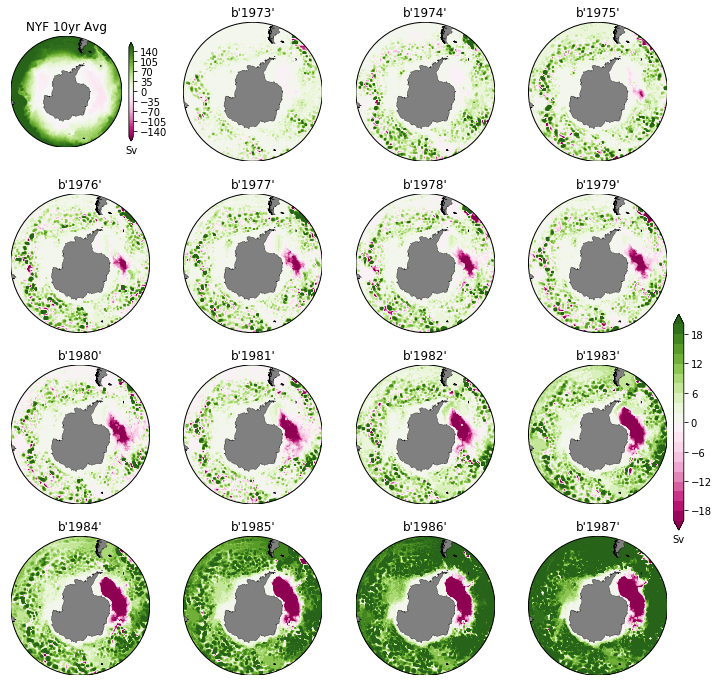

In [10]:
of=os.path.join(NYFCntrlDir,'ann_psi.npy')
print(of)
cntrl_psi=np.load(of)

of=os.path.join(NYFPertDir,'ann_psi.npy')
print(of)
pert_psi=np.load(of)

plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Psi Anom')
#plot ACC transport
yrs=np.arange(1973,2016,1)

ii=0
clev = np.arange(-160,160,5)
print(clev)

plt.subplot(5,4,1)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
#map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:1000,:],geolat_t[0:1000,:]) 
p1=map.contourf(X,Y,np.mean(cntrl_psi[0:10,:,:],axis=0), cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
#clev3 = np.arange(0,200,20)
#print clev3
#map.contour(X,Y,np.mean(cntrl_psi[0:5],axis=0),levels=clev,colors='k',linewidths=1)    
#tit=yrs[yr].astype('S4')
plt.title('NYF 10yr Avg')
    
clev = np.linspace(-20,20,21)

for yr in range(0,15):
    
    #np.mean(pert_gmoc[t1:t2,:,:],axis=0)-np.mean(cntrl_gmoc[t1:t2,:,:],axis=0)
    plt.subplot(5,4,yr+2)
    map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    #map.drawparallels(np.arange(-80.,81.,15.))
    #map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    X, Y = map(geolon_t[0:1000,:],geolat_t[0:1000,:]) 
    p1=map.contourf(X,Y,pert_psi[yr,:,:]-cntrl_psi[yr,:,:], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.7)
    #cb.ax.set_xlabel('Sv')
    #clev3 = np.arange(0,200,20)
    #print clev3
    #map.contour(X,Y,np.mean(cntrl_psi[0:5],axis=0),levels=clev,colors='k',linewidths=1)
    
    tit=yrs[yr].astype('S4')
    plt.title(tit)
    
    
ax3 = plt.axes([0.99,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('Sv')

plt.tight_layout()

#of = os.path.join(NYFPertDir,'wpm2_cn.pdf')
#print of
#plt.savefig(of)
#of = os.path.join(NYFPertDir,'wpm2_cn.png')
#plt.savefig(of,dpi=220)
#of = os.path.join(NYFPertDir,'gmoc_anom.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'psi_anom.png')
plt.savefig(of,dpi=220)

In [12]:
# do psi max between lon 67-69S
i1=np.argwhere(xt_ocean<-69)
i2=np.argwhere(xt_ocean<-67)
i1=i1[-1]
i2=i2[-1]

j1=np.argwhere(yt_ocean<-54)
j1=j1[-1]

print(j1, i1, i2)

[600] [2109] [2129]


(50,)
15
[600] [2109] [2129]
[448] [2199] [2949]


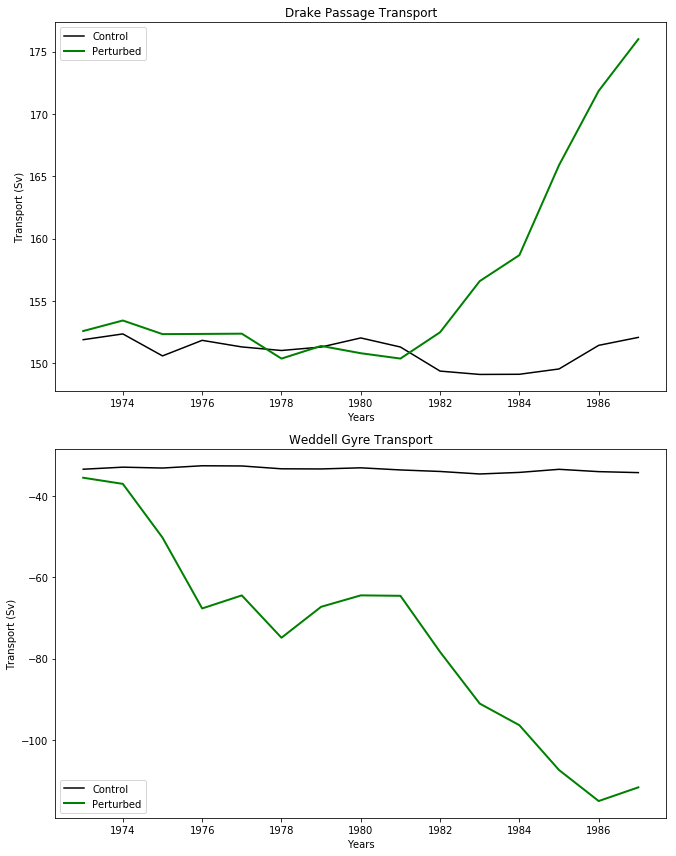

In [19]:
#plot Drake Passage time series

yrs=np.arange(1973,2016,1)
T=np.arange(50)
print(T.shape)


#ts =pert.tx_trans.shape[0]
#print(ts)
print(pert_psi.shape[0])
ts=15
#print yrs[yr].astype('S4')
#tit=yrs[yr].astype('S4')
#plt.title(yrs[yr])plt.title(yrs[yr])

# do ACC psi max between lon 67-69S
i1=np.argwhere(xt_ocean<-69)
i2=np.argwhere(xt_ocean<-67)
i1=i1[-1]
i2=i2[-1]

j1=np.argwhere(yt_ocean<-54)
j1=j1[-1]

print(j1, i1, i2)
j1=600
i1=2109
i2=2129

cntrl_dp = cntrl_psi[:,0:j1,i1:i2]
cntrl_dp_bar = np.mean(cntrl_dp,2)
cntrl_dp_ts = np.max(cntrl_dp_bar,1)

pert_dp = pert_psi[:,0:j1,i1:i2]
pert_dp_bar = np.mean(pert_dp,2)
pert_dp_ts = np.max(pert_dp_bar,1)

plt.subplot(211)
plt.plot(yrs[0:ts],cntrl_dp_ts[0:ts],linestyle='-',color='k',label='Control',linewidth=1.5)
plt.plot(yrs[0:ts],pert_dp_ts[0:ts],linestyle='-',color='g',label='Perturbed',linewidth=2)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit=('Drake Passage Transport')
plt.title(tit)
plt.legend(fontsize=10)

# do Weddell Gyre psi min between lon 67-69S
i1=np.argwhere(xt_ocean<-60)
i2=np.argwhere(xt_ocean<15)
i1=i1[-1]
i2=i2[-1]

j1=np.argwhere(yt_ocean<-62)
j1=j1[-1]

print(j1, i1, i2)
j1=448
i1=2199
i2=2949

cntrl_wg = cntrl_psi[:,0:j1,i1:i2]
#cntrl_wg_bar = np.mean(cntrl_wg,2)
cntrl_wg_ts = np.min(np.min(cntrl_wg,2),1)

pert_wg = pert_psi[:,0:j1,i1:i2]
#pert_wg_bar = np.mean(pert_wg,2)
pert_wg_ts = np.min(np.min(pert_wg,2),1)

plt.subplot(212)
plt.plot(yrs[0:ts],cntrl_wg_ts[0:ts],linestyle='-',color='k',label='Control',linewidth=1.5)
plt.plot(yrs[0:ts],pert_wg_ts[0:ts],linestyle='-',color='g',label='Perturbed',linewidth=2)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit=('Weddell Gyre Transport')
plt.title(tit)
plt.legend(fontsize=10)

plt.tight_layout()

#of = os.path.join(NYFPertDir,'dp_ts.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'dp_ts.png')
plt.savefig(of,dpi=220)

In [18]:
print(st_ocean[65])

3946.16599027


In [22]:
#do temp
Ocean_File = os.path.join(NYFCntrlDir,'temp_st65.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl.temp.shape)


Ocean_File = os.path.join(NYFPertDir,'temp_st65.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(pert.temp.shape)

cntrl_temp_st65=np.zeros((15,1000,3600))
pert_temp_st65=np.zeros((15,1000,3600))

print(cntrl_temp_st65.shape)
print(pert_temp_st65.shape)

seasons=np.arange(443,509)

expts = ['kds75_cp','kds75_wp2']

for e in expts:
      
    for yr in range(0,15):
        print(yr)
        if yr<1:
            #first year is only 9 months ... use first 3 months of next year
            t1=0
            t2=4
        elif yr<2:
            t1=3
            t2=7
        else:
            t1=t2
            t2=t2+4

        if e == 'kds75_cp':
            print(yr, t1, t2, seasons[t1:t2])
            cntrl_temp_st65[yr,:,:] = np.mean(cntrl.temp[t1:t2,:,0:1000,:],axis=0)
            #of=os.path.join(NYFCntrlDir,'psi.npy')
            #print(of)
            #a=np.save(of,psi_sum[:,0:1000,:])
        if e == 'kds75_wp2':
            print(yr, t1, t2, seasons[t1:t2])
            pert_temp_st65[yr,:,:] = np.mean(pert.temp[t1:t2,:,0:1000,:],axis=0)
            #of=os.path.join(NYFPertDir,'psi.npy')
            #print(of)
            #a=np.save(of,psi_sum[:,0:1000,:])

#of=os.path.join(NYFCntrlDir,'temp_ann_st65.npy')
#print(of)
#a=np.save(of,cntrl_temp)
            
#of=os.path.join(NYFPertDir,'temp_ann_st65.npy')
#print(of)
#a=np.save(of,pert_temp)

            

/g/data3/hh5/tmp/pas561/kds75_cp/temp_st65.nc
(67, 1, 1001, 3600)
/g/data3/hh5/tmp/pas561/kds75_wp2/temp_st65.nc
(65, 1, 1001, 3600)
(15, 1000, 3600)
(15, 1000, 3600)
0
0 0 4 [443 444 445 446]
1
1 3 7 [446 447 448 449]
2
2 7 11 [450 451 452 453]
3
3 11 15 [454 455 456 457]
4
4 15 19 [458 459 460 461]
5
5 19 23 [462 463 464 465]
6
6 23 27 [466 467 468 469]
7
7 27 31 [470 471 472 473]
8
8 31 35 [474 475 476 477]
9
9 35 39 [478 479 480 481]
10
10 39 43 [482 483 484 485]
11
11 43 47 [486 487 488 489]
12
12 47 51 [490 491 492 493]
13
13 51 55 [494 495 496 497]
14
14 55 59 [498 499 500 501]
0
0 0 4 [443 444 445 446]
1
1 3 7 [446 447 448 449]
2
2 7 11 [450 451 452 453]
3
3 11 15 [454 455 456 457]
4
4 15 19 [458 459 460 461]
5
5 19 23 [462 463 464 465]
6
6 23 27 [466 467 468 469]
7
7 27 31 [470 471 472 473]
8
8 31 35 [474 475 476 477]
9
9 35 39 [478 479 480 481]
10
10 39 43 [482 483 484 485]
11
11 43 47 [486 487 488 489]
12
12 47 51 [490 491 492 493]
13
13 51 55 [494 495 496 497]
14
14 55 59 [

[ -3.00000000e-01  -2.90000000e-01  -2.80000000e-01  -2.70000000e-01
  -2.60000000e-01  -2.50000000e-01  -2.40000000e-01  -2.30000000e-01
  -2.20000000e-01  -2.10000000e-01  -2.00000000e-01  -1.90000000e-01
  -1.80000000e-01  -1.70000000e-01  -1.60000000e-01  -1.50000000e-01
  -1.40000000e-01  -1.30000000e-01  -1.20000000e-01  -1.10000000e-01
  -1.00000000e-01  -9.00000000e-02  -8.00000000e-02  -7.00000000e-02
  -6.00000000e-02  -5.00000000e-02  -4.00000000e-02  -3.00000000e-02
  -2.00000000e-02  -1.00000000e-02   2.77555756e-16   1.00000000e-02
   2.00000000e-02   3.00000000e-02   4.00000000e-02   5.00000000e-02
   6.00000000e-02   7.00000000e-02   8.00000000e-02   9.00000000e-02
   1.00000000e-01   1.10000000e-01   1.20000000e-01   1.30000000e-01
   1.40000000e-01   1.50000000e-01   1.60000000e-01   1.70000000e-01
   1.80000000e-01   1.90000000e-01   2.00000000e-01   2.10000000e-01
   2.20000000e-01   2.30000000e-01   2.40000000e-01   2.50000000e-01
   2.60000000e-01   2.70000000e-01

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


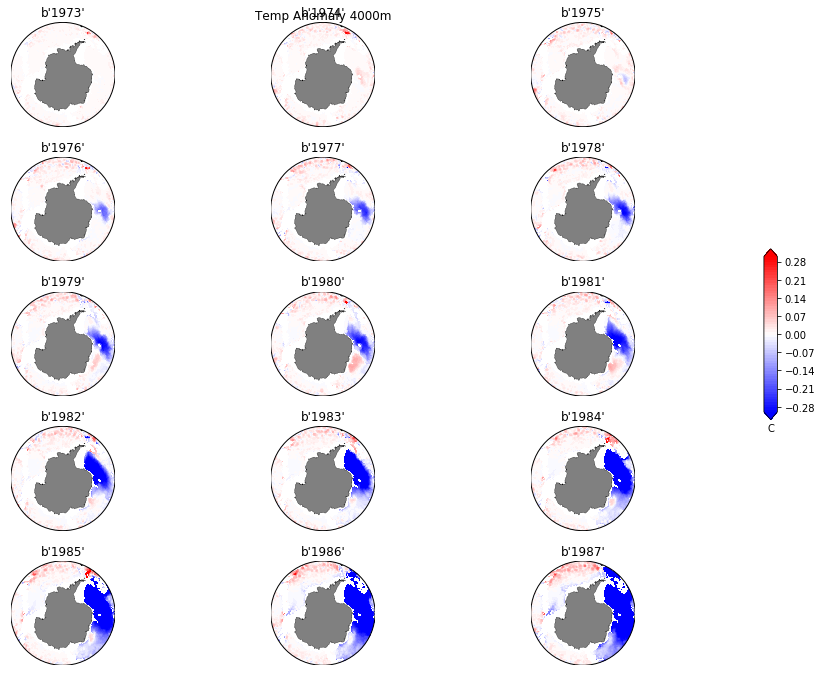

In [26]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.suptitle('Temp Anomaly 4000m')
yrs=np.arange(1973,2016,1)

clev = np.arange(-.3,.31,.01)
print(clev)
st=65
print(st_ocean[st])
ii=0
for yr in range(0,15):
    #print yr

    plt.subplot(5,3,yr+1)
    map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
    map.drawcoastlines(linewidth=0.25)
    map.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    #map.drawparallels(np.arange(-80.,81.,15.))
    #map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
    X, Y = map(geolon_t[0:1000,:],geolat_t[0:1000,:]) 
    p1=map.contourf(X,Y,pert_temp_st65[yr,:,:]-cntrl_temp_st65[yr,:,:], cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
    #cb=plt.colorbar(orientation='vertical',shrink = 0.5)
    #cb.ax.set_xlabel('N/m2')
    #clev3 = np.arange(0,5000,1000)
    #map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
    plt.title(yrs[yr].astype('S4'))

ax3 = plt.axes([0.99,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('C')

plt.tight_layout()

#of = os.path.join(NYFPertDir,'temp_4000m.pdf')
#print of
#plt.savefig(of)
of = os.path.join(NYFPertDir,'temp_4000m.png')
plt.savefig(of,dpi=220)
